In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow
from google.colab import drive
import os
import random
import cv2
from google.colab.patches import cv2_imshow
from skimage.io import imread
from skimage.util import montage as montage2d
from skimage.morphology import skeletonize
from skimage.filters import threshold_otsu
from skimage.filters import threshold_yen as thresh_func
from skimage.filters import median
from skimage.morphology import disk, diamond
from skimage.morphology import label as sk_label
from skimage.morphology import opening, closing
from skimage.morphology import medial_axis
from skimage.morphology import skeletonize
from skimage import draw
from scipy import ndimage
import networkx as nx
from IPython.display import Image
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize
from scipy.stats import entropy
from skimage.feature import greycomatrix, greycoprops
from scipy.fft import fft2, fftshift
from scipy.signal import welch

In [ ]:
#Connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DRIVE_FOLDER_PATH_PARKINSON = '/content/drive/MyDrive/Bioscience_Project/drawings_data/parkinson'
DRIVE_FOLDER_PATH_HEALTHY = '/content/drive/MyDrive/Bioscience_Project/drawings_data/healthy'

In [ ]:
# PLOTTING STYLE
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["figure.dpi"] = 160
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
#plt.rcParams['axes.labelcolor'] = 'white'
plt.style.use('ggplot')
%matplotlib notebook

# DATA EXPLORATION

In [ ]:
# Get a list of image filenames from the specified folder for Parkinson's disease
parkinson_images = [file for file in os.listdir(DRIVE_FOLDER_PATH_PARKINSON) if file.endswith('.png')]
# Get a list of image filenames from the specified folder for healthy drawings
healthy_images = [file for file in os.listdir(DRIVE_FOLDER_PATH_HEALTHY) if file.endswith('.png')]

In [ ]:
# Count the number of PNG files in parkinson_images
png_count = sum(1 for filename in parkinson_images if filename.lower().endswith('.png'))
print("Number of PNG files:", png_count)

Number of PNG files: 102


In [ ]:
# Count the number of PNG files in healthy_images
png_count = sum(1 for filename in healthy_images if filename.lower().endswith('.png'))
print("Number of PNG files:", png_count)

Number of PNG files: 102


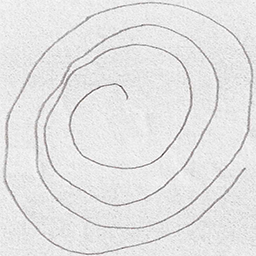

Image Shape: 256x256


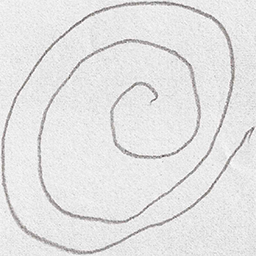

Image Shape: 256x256


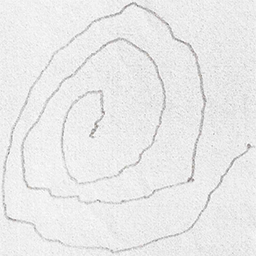

Image Shape: 256x256


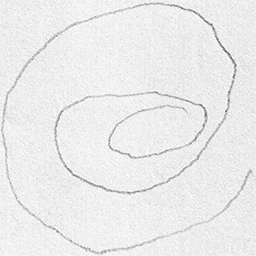

Image Shape: 256x256


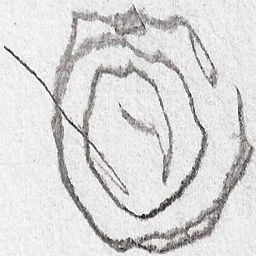

Image Shape: 256x256


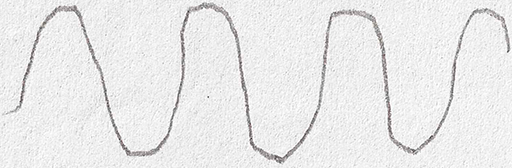

Image Shape: 512x168


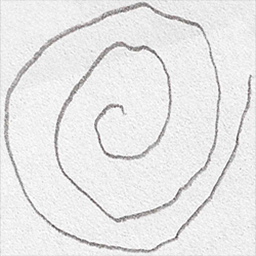

Image Shape: 256x256


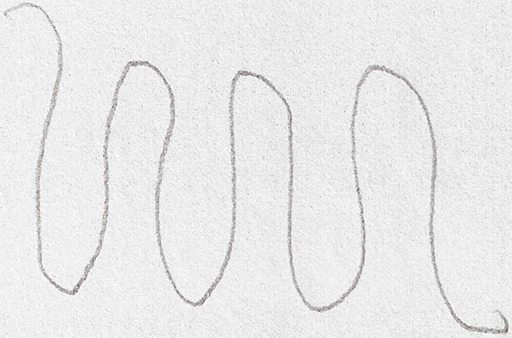

Image Shape: 512x338


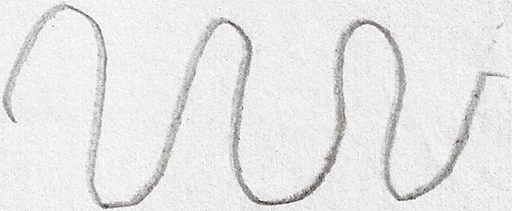

Image Shape: 512x211


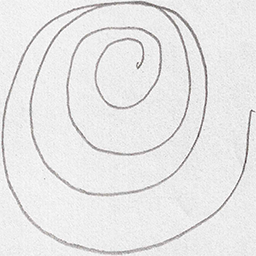

Image Shape: 256x256


In [ ]:
# Define the number of images you want to display (max 5)
num_images_to_display = 5

# Randomly select 5 images from the Parkinson's disease category
random_parkinson_images = random.sample(parkinson_images, num_images_to_display)

# Randomly select 5 images from the Healthy category
random_healthy_images = random.sample(healthy_images, num_images_to_display)

# Display the randomly selected Parkinson's disease images with shape information
for image_filename in random_parkinson_images:
    image_path = os.path.join(DRIVE_FOLDER_PATH_PARKINSON, image_filename)

    # Load the image
    parkinson_image = cv2.imread(image_path)

    if parkinson_image is not None:
        # Get image dimensions (shape)
        height, width, _ = parkinson_image.shape

        # Display the image with shape information
        cv2_imshow(cv2.cvtColor(parkinson_image, cv2.COLOR_BGR2RGB))
        print(f"Image Shape: {width}x{height}")
    else:
        print(f"Error loading Parkinson's disease image: {image_path}")

# Display the randomly selected Healthy images with shape information
for image_filename in random_healthy_images:
    image_path = os.path.join(DRIVE_FOLDER_PATH_HEALTHY, image_filename)

    # Load the image
    healthy_image = cv2.imread(image_path)

    if healthy_image is not None:
        # Get image dimensions (shape)
        height, width, _ = healthy_image.shape

        # Display the image with shape information
        cv2_imshow(cv2.cvtColor(healthy_image, cv2.COLOR_BGR2RGB))
        print(f"Image Shape: {width}x{height}")
    else:
        print(f"Error loading Healthy image: {image_path}")


In [ ]:
#Check the shape of images
# Function to get image shapes
def print_image_shapes(folder_path):
    print(f"Images in '{folder_path}':")
    for filename in os.listdir(folder_path):
        if filename.lower().endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            image = imread(image_path, as_gray=True)
            print(f"Image '{filename}': Shape {image.shape}")

# Print shapes of PNG images in Parkinson's folder
print_image_shapes(DRIVE_FOLDER_PATH_PARKINSON)

# Print shapes of PNG images in Healthy folder
print_image_shapes(DRIVE_FOLDER_PATH_HEALTHY)

Images in '/content/drive/MyDrive/Bioscience_Project/drawings_data/parkinson':
Image 'V14PE03.png': Shape (256, 256)
Image 'V15PE01.png': Shape (256, 256)
Image 'V11PE03.png': Shape (256, 256)
Image 'V10PE03.png': Shape (256, 256)
Image 'V09PE01.png': Shape (256, 256)
Image 'V08PE01.png': Shape (256, 256)
Image 'V02PE01.png': Shape (256, 256)
Image 'V06PE01.png': Shape (256, 256)
Image 'V03PE04.png': Shape (256, 256)
Image 'V07PE01.png': Shape (256, 256)
Image 'V05PE01.png': Shape (256, 256)
Image 'V01PE01.png': Shape (256, 256)
Image 'V03PE07.png': Shape (256, 256)
Image 'V04PE01.png': Shape (256, 256)
Image 'V03PE01.png': Shape (256, 256)
Image 'V02PE02.png': Shape (256, 256)
Image 'V03PO03.png': Shape (251, 512)
Image 'V15PE02.png': Shape (256, 256)
Image 'V05PO01.png': Shape (344, 512)
Image 'V07PE03.png': Shape (256, 256)
Image 'V07PE02.png': Shape (256, 256)
Image 'V10PO01.png': Shape (168, 512)
Image 'V04PE02.png': Shape (256, 256)
Image 'V06PO01.png': Shape (353, 512)
Image 'V1

# DATA LOADING



In [ ]:
from pathlib import Path
import pandas as pd

data_dir = Path('/content/drive/MyDrive/Bioscience_Project/drawings_data')

# Collect image paths using the glob pattern
image_paths = list(data_dir.glob('*/*/*.png'))

# Exclude .DS_Store files from the list of image paths
image_paths = [path for path in image_paths if not path.name.startswith('.DS_Store')]

# Create a list to hold the extracted information
data = []

for path in image_paths:
    parts = path.parts
    img_id = path.stem
    disease = parts[-3]
    activity = parts[-2]

    data.append((str(path), img_id, disease, activity))

# Create the DataFrame
columns = ['path', 'img_id', 'disease', 'activity']
draw_df = pd.DataFrame(data, columns=columns)

print(draw_df.shape, 'images loaded')
draw_df.sample(10)


(202, 4) images loaded


path   img_id    disease  \
46   /content/drive/MyDrive/Bioscience_Project/draw...  V07PO02  parkinson   
1    /content/drive/MyDrive/Bioscience_Project/draw...  V07PO03  parkinson   
139  /content/drive/MyDrive/Bioscience_Project/draw...  V55HE15    healthy   
145  /content/drive/MyDrive/Bioscience_Project/draw...  V06HE01    healthy   
116  /content/drive/MyDrive/Bioscience_Project/draw...  V08HE02    healthy   
199  /content/drive/MyDrive/Bioscience_Project/draw...  V09HO01    healthy   
74   /content/drive/MyDrive/Bioscience_Project/draw...  V09PE02  parkinson   
43   /content/drive/MyDrive/Bioscience_Project/draw...  V03PO06  parkinson   
196  /content/drive/MyDrive/Bioscience_Project/draw...  V55HO02    healthy   
85   /content/drive/MyDrive/Bioscience_Project/draw...  V11PE02  parkinson   

    activity  
46      wave  
1       wave  
139   spiral  
145   spiral  
116   spiral  
199     wave  
74    spiral  
43      wave  
196     wave  
85    spiral

# PRE PROCESSING


In [ ]:
target_size = (256, 256)  # Specifica le dimensioni desiderate (altezza x larghezza)
def process_imread(in_path, target_size=(256, 256)):
    """Read images, invert and scale them, and resize to the target size"""
    c_img = 1.0 - imread(in_path, as_gray=True)

    # Resize to the target size
    resized_img = resize(c_img, target_size)
    return resized_img

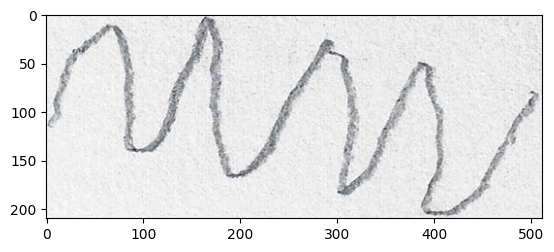

In [ ]:
row_index = 0
image_path = draw_df.loc[row_index, 'path']
img = mpimg.imread(image_path)
plt.imshow(img)
plt.show()

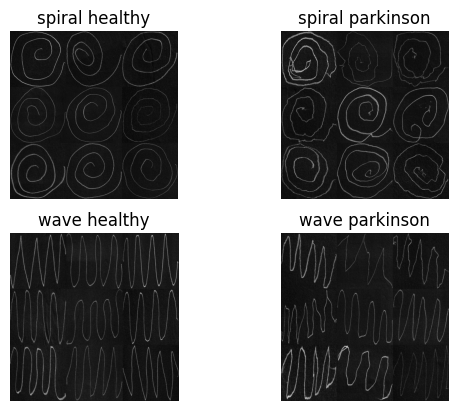

In [ ]:
fig, m_axs = plt.subplots(2, 2)
for c_ax, (c_lab, c_rows) in zip(m_axs.flatten(), draw_df.groupby(['activity', 'disease'])):
    prev_img = montage2d(np.stack([process_imread(x, target_size) for x in c_rows['path'].iloc[0:9]], 0))
    c_ax.imshow(prev_img, cmap='gray')
    c_ax.set_title(' '.join(c_lab))
    c_ax.axis('off')

threshold of images

In [ ]:
def read_and_thresh(in_path, resize=True):
    c_img = process_imread(in_path, target_size=(256, 256))
    c_img = (255*c_img).clip(0, 255).astype('uint8')
    c_img = median(c_img, disk(1))
    c_thresh = thresh_func(c_img)
    return c_img>c_thresh

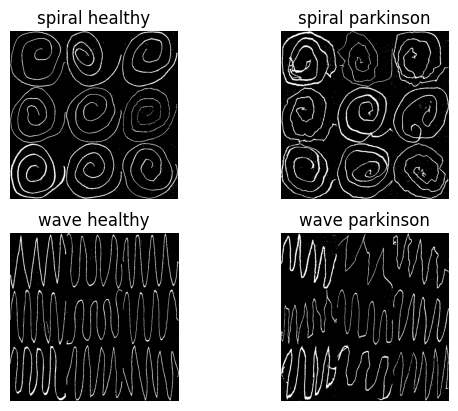

In [ ]:
fig, m_axs = plt.subplots(2, 2)
for c_ax, (c_lab, c_rows) in zip(m_axs.flatten(), draw_df.groupby(['activity', 'disease'])):
    prev_img = montage2d(np.stack([read_and_thresh(x) for x in c_rows['path'].iloc[0:9]], 0))
    c_ax.imshow(prev_img, cmap='gray')
    c_ax.set_title(' '.join(c_lab))
    c_ax.axis('off')

In [ ]:
# Apply process_imread to get resized and thresholded images
draw_df['thresh_img'] = draw_df['path'].map(lambda x: read_and_thresh(x, resize=False))


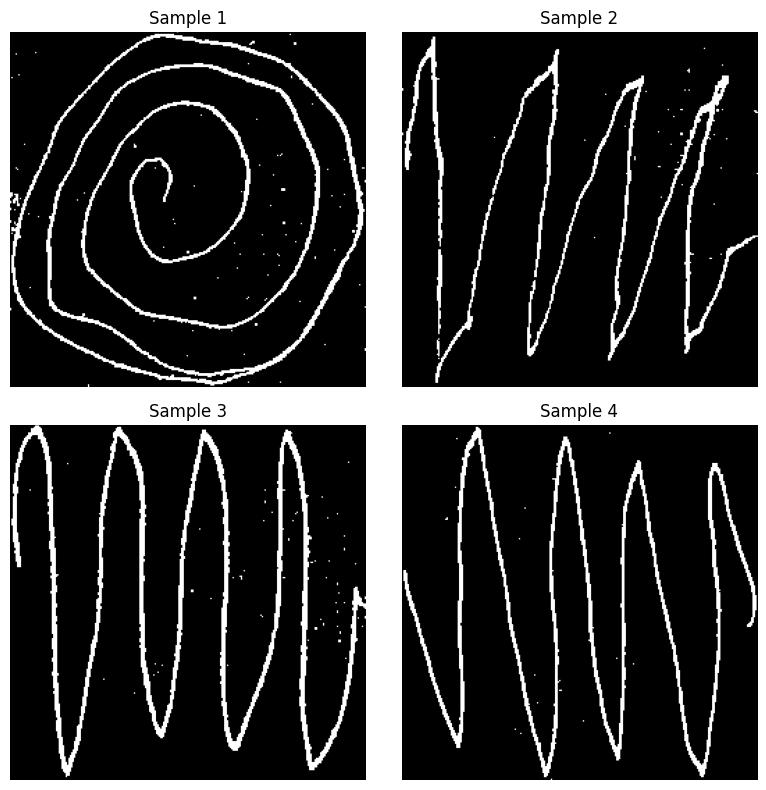

In [ ]:
#ispeziono la colonna
# Seleziona alcune righe casuali dal DataFrame (ad esempio, le prime 4)
sample_rows = draw_df.sample(4, random_state=42)

# Crea una figura con 2 righe e 2 colonne per visualizzare le immagini
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Itera sulle righe campione e visualizza le immagini thresh_img
for i, (index, row) in enumerate(sample_rows.iterrows()):
    ax = axs[i // 2, i % 2]  # Ottieni l'asse corrispondente nella griglia
    thresh_img = row['thresh_img']
    ax.imshow(thresh_img, cmap='gray')
    ax.set_title(f"Sample {i + 1}")
    ax.axis('off')

plt.tight_layout()
plt.show()


cleaning

In [ ]:
# Define the label_sort function
def label_sort(in_img, cutoff=0.01):
    total_cnt = np.sum(in_img > 0)
    lab_img = sk_label(in_img)
    new_image = np.zeros_like(lab_img)
    remap_index = []
    for k in np.unique(lab_img[lab_img > 0]):
        cnt = np.sum(lab_img == k)  # get area of labelled object
        if cnt > total_cnt * cutoff:
            remap_index += [(k, cnt)]
    sorted_index = sorted(remap_index, key=lambda x: -x[1])  # reverse sort - largest is first
    for new_idx, (old_idx, idx_count) in enumerate(sorted_index, 1):  # enumerate starting at id 1
        new_image[lab_img == old_idx] = new_idx
    return new_image

# Apply label_sort and closing to create 'clean_img' column
draw_df['clean_img'] = draw_df['thresh_img'].apply(lambda x: closing(label_sort(x) > 0, disk(1)))

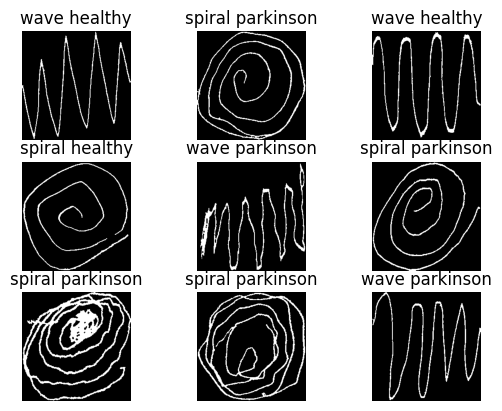

In [ ]:
# Visualize cleaned images
fig, m_axs = plt.subplots(3, 3)
for c_ax, (c_lab, c_row) in zip(m_axs.flatten(), draw_df.sample(9, random_state=1).iterrows()):
    c_ax.imshow(c_row['clean_img'], cmap='gray')
    c_ax.set_title('{activity} {disease}'.format(**c_row))
    c_ax.axis('off')

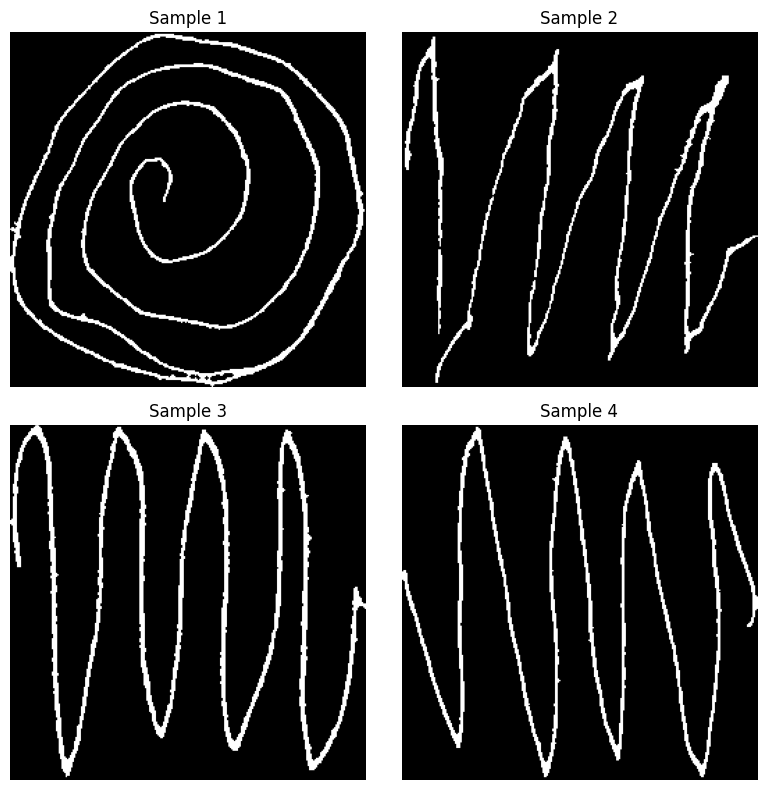

In [ ]:
# Seleziona alcune righe casuali dal DataFrame (ad esempio, le prime 4)
sample_rows = draw_df.sample(4, random_state=42)

# Crea una figura con 2 righe e 2 colonne per visualizzare le immagini
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Itera sulle righe campione e visualizza le immagini clean_img
for i, (index, row) in enumerate(sample_rows.iterrows()):
    ax = axs[i // 2, i % 2]  # Ottieni l'asse corrispondente nella griglia
    clean_img = row['clean_img']
    ax.imshow(clean_img, cmap='gray')
    ax.set_title(f"Sample {i + 1}")
    ax.axis('off')

plt.tight_layout()
plt.show()


every point of pixel

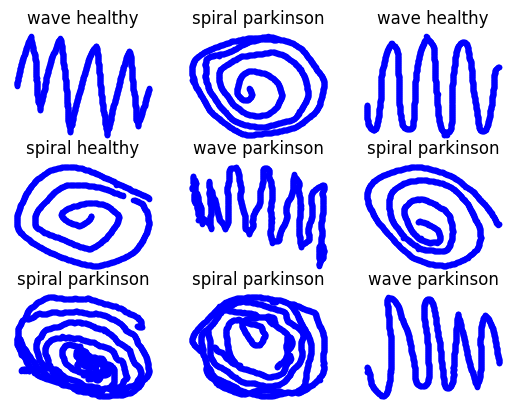

In [ ]:
fig, m_axs = plt.subplots(3, 3)
for c_ax, (c_lab, c_row) in zip(m_axs.flatten(), draw_df.sample(9, random_state=1).iterrows()):
    skel_img = skeletonize(c_row['clean_img'])  # Compute the skeleton of the cleaned image

    # Get the coordinates of the skeleton points
    skel_y, skel_x = np.where(skel_img)

    # Normalize the coordinates to be between 0 and 1
    skel_x = skel_x * 1.0 / skel_img.shape[1]
    skel_y = skel_y * 1.0 / skel_img.shape[0]

    # Plot the skeleton points on the current axis
    c_ax.plot(skel_x, skel_y, 'b.')

    c_ax.set_title('{activity} {disease}'.format(**c_row))
    c_ax.axis('off')


In [ ]:
all_row_list = []
for _, c_row in draw_df.iterrows():
    skel_img = skeletonize(c_row['clean_img'])
    skel_y, skel_x = np.where(skel_img)
    skel_x = skel_x*1.0/skel_img.shape[1]
    skel_y = skel_y*1.0/skel_img.shape[0]
    for x, y in zip(skel_x, skel_y):
        d_row = dict(**{k: v for k,v in c_row.items() if len(np.shape(v))<1})
        d_row['x'] = x
        d_row['y'] = y
        all_row_list += [d_row]

In [ ]:
all_row_df = pd.DataFrame(all_row_list)
all_row_df.sample(3)

path   img_id    disease  \
99071   /content/drive/MyDrive/Bioscience_Project/draw...  V15PE01  parkinson   
29165   /content/drive/MyDrive/Bioscience_Project/draw...  V10PO02  parkinson   
205607  /content/drive/MyDrive/Bioscience_Project/draw...  V06HE03    healthy   

       activity         x         y  
99071    spiral  0.550781  0.386719  
29165      wave  0.796875  0.890625  
205607   spiral  0.738281  0.890625

In [ ]:
# Update the draw_df DataFrame with the x and y values from all_row_df
for idx, row in all_row_df.iterrows():
    img_id = row['img_id']
    draw_df.loc[draw_df['img_id'] == img_id, 'x'] = row['x']
    draw_df.loc[draw_df['img_id'] == img_id, 'y'] = row['y']

# Now draw_df contains the x and y coordinates
print(draw_df.sample(3))

                                                  path   img_id    disease  \
117  /content/drive/MyDrive/Bioscience_Project/draw...  V11HE02    healthy   
145  /content/drive/MyDrive/Bioscience_Project/draw...  V06HE01    healthy   
46   /content/drive/MyDrive/Bioscience_Project/draw...  V07PO02  parkinson   

    activity                                         thresh_img  \
117   spiral  [[False, False, False, False, False, False, Fa...   
145   spiral  [[False, False, False, False, False, False, Fa...   
46      wave  [[False, False, False, False, False, False, Fa...   

                                             clean_img         x         y  
117  [[False, False, False, False, False, False, Fa...  0.328125  0.980469  
145  [[False, False, False, False, False, False, Fa...  0.332031  0.984375  
46   [[False, False, False, False, False, False, Fa...  0.613281  0.988281  


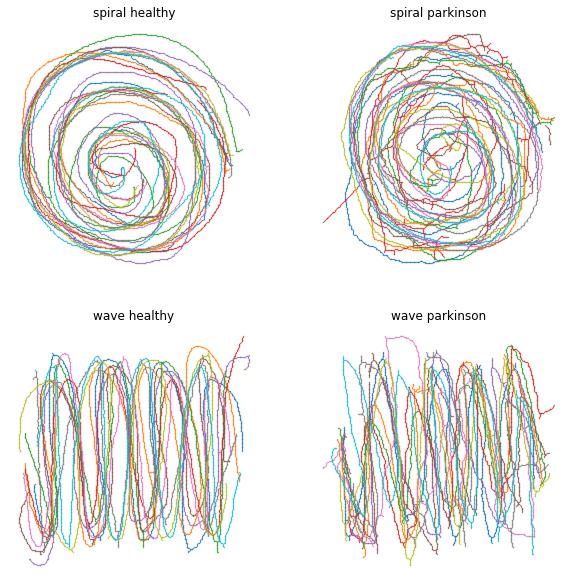

In [ ]:
#differenze nelle immagini
# Create a list of unique 'activity' and 'disease' combinations
unique_combinations = all_row_df[['activity', 'disease']].drop_duplicates()

# Randomly select 10 unique img_ids for each combination
selected_img_ids = []
for _, row in unique_combinations.iterrows():
    subset = all_row_df[(all_row_df['activity'] == row['activity']) & (all_row_df['disease'] == row['disease'])]
    img_ids = subset['img_id'].unique()
    selected_img_ids.extend(random.sample(img_ids.tolist(), min(len(img_ids), 10)))

# Filter the dataframe to include only the selected img_ids
filtered_df = all_row_df[all_row_df['img_id'].isin(selected_img_ids)]

# Create the plot
fig, m_axs = plt.subplots(2, 2, figsize=(10, 10), dpi=72)
for c_ax, (c_lab, c_rows) in zip(m_axs.flatten(), filtered_df.groupby(['activity', 'disease'])):
    for c_id, d_rows in c_rows.groupby('img_id'):
        mean_std = np.mean([d_rows['x'].std(), d_rows['y'].std()])
        c_ax.plot((d_rows['x'] - d_rows['x'].mean()) / mean_std,
                  (d_rows['y'] - d_rows['y'].mean()) / mean_std, '.', label=c_id, ms=0.75)
    # c_ax.legend()
    c_ax.set_title(' '.join(c_lab))
    c_ax.axis('off')

plt.show()


# FEATURES EXTRACTION

pen tickness quantification

In [ ]:
def stroke_thickness_img(in_img):
    skel, distance = medial_axis(in_img, return_distance=True)
    skeleton = skeletonize(in_img)
    # Distance to the background for pixels of the skeleton
    return distance * skeleton

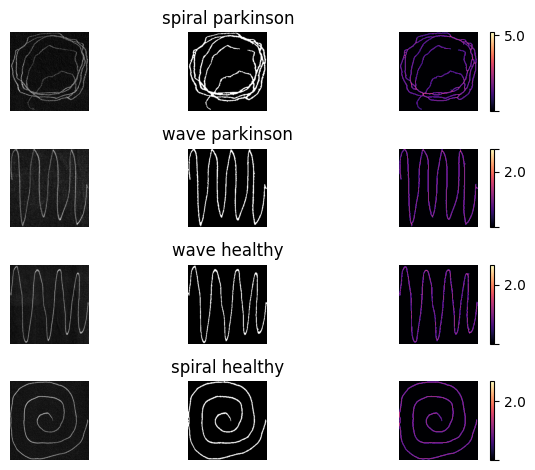

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Campiona due casi 'parkinson'
parkinson_cases = draw_df[(draw_df['activity'].isin(['spiral', 'wave'])) & (draw_df['disease'] == 'parkinson')].sample(2, random_state=2)

# Campiona due casi 'healthy'
healthy_cases = draw_df[(draw_df['activity'].isin(['spiral', 'wave'])) & (draw_df['disease'] == 'healthy')].sample(2, random_state=2)

# Combina i casi selezionati
selected_cases = pd.concat([parkinson_cases, healthy_cases])

# Crea una griglia di grafici
fig, m_axs = plt.subplots(4, 3)

i = 0
for c_ax, (c_lab, c_row) in zip(m_axs.flatten(), selected_cases.iterrows()):

    dist_img = stroke_thickness_img(c_row['clean_img'])

    cset1 = m_axs[i, 2].imshow(dist_img, cmap='magma', norm=mpl.colors.PowerNorm(gamma=0.5))
    cbar = fig.colorbar(cset1, ax=m_axs[i, 2], format='%.1f')
    for label in cbar.ax.yaxis.get_ticklabels()[::2]:
        label.set_visible(False)
    m_axs[i, 2].axis('off')

    cset2 = m_axs[i, 1].imshow(c_row['clean_img'], cmap='gray')
    m_axs[i, 1].set_title('{activity} {disease}'.format(**c_row))
    m_axs[i, 1].axis('off')

    cset3 = m_axs[i, 0].imshow(process_imread(c_row['path']), cmap='gray')
    m_axs[i, 0].axis('off')

    i += 1
    fig.tight_layout()

plt.show()


In [ ]:
def stroke_thickness(in_img):
    skel, distance = medial_axis(in_img, return_distance=True)
    skeleton = skeletonize(in_img)
    # Distance to the background for pixels of the skeleton
    dist = distance * skeleton
    return dist[dist>0]

In [ ]:
draw_df['thickness'] = draw_df['clean_img'].map(lambda x: stroke_thickness(x))

In [ ]:
draw_df['mean_thickness'] = draw_df['thickness'].apply(np.mean)
draw_df['std_thickness'] = draw_df['thickness'].apply(np.std)

In [ ]:
range_thickness = draw_df.groupby(['activity', 'disease'])['mean_thickness'].agg(lambda x: np.max(x) - np.min(x))
range_thickness

activity  disease  
spiral    healthy      1.741688
          parkinson    2.662872
wave      healthy      1.800135
          parkinson    1.738006
Name: mean_thickness, dtype: float64

In [ ]:
draw_df.groupby(['activity', 'disease'])['mean_thickness'].mean()

activity  disease  
spiral    healthy      1.901084
          parkinson    1.886898
wave      healthy      1.691474
          parkinson    1.875398
Name: mean_thickness, dtype: float64

In [ ]:
draw_df.groupby(['activity', 'disease'])['std_thickness'].mean()

activity  disease  
spiral    healthy      0.426144
          parkinson    0.525258
wave      healthy      0.503552
          parkinson    0.564384
Name: std_thickness, dtype: float64

In [ ]:
range_thickness = draw_df.groupby(['activity', 'disease'])['std_thickness'].agg(lambda x: np.max(x) - np.min(x))
range_thickness

activity  disease  
spiral    healthy      0.451398
          parkinson    1.682739
wave      healthy      0.380710
          parkinson    0.753593
Name: std_thickness, dtype: float64

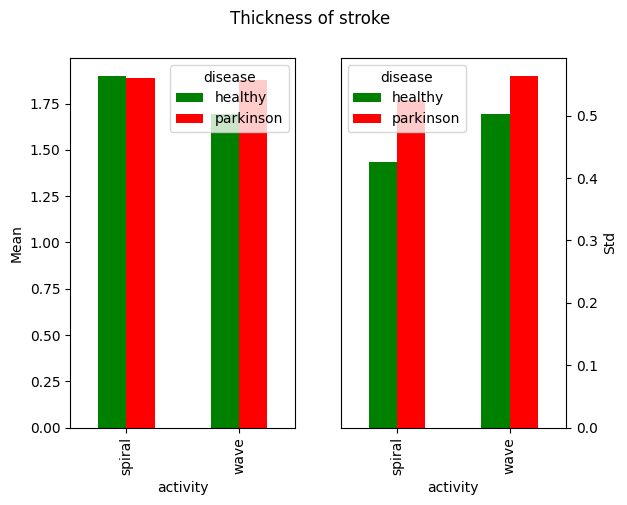

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=2)
plt.suptitle('Thickness of stroke')
draw_df.groupby(['activity','disease'])['mean_thickness'].mean().unstack().plot(kind='bar', legend=True,
                                                                                color=['g', 'r'], ax = ax[0])
ax[0].set_ylabel("Mean")
draw_df.groupby(['activity','disease'])['std_thickness'].mean().unstack().plot(kind='bar', legend=True,
                                                                               color=['g', 'r'], ax = ax[1])
ax[1].set_ylabel("Std")
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
plt.show()

end points e branch points

In [ ]:
# Definisci il kernel per i punti finali (endpoints) e i punti di intersezione (branch points)
from scipy.signal import convolve2d

k_endpoints = np.array([[0, 0, 0],
                        [0, 1, 0],
                        [1, 1, 1]])
k_branch_points = np.array([[1, 1, 1],
                            [1, 1, 1],
                            [1, 1, 1]])

def count_endpoints_branch_points(image):
    # Applica la skeletonization all'immagine
    skeletized = skeletonize(image)

    # Convoluzione con il kernel per individuare i punti finali (endpoints) e i punti di intersezione (branch points)
    endpoints = convolve2d(skeletized, k_endpoints, mode='same') == 1
    branch_points = convolve2d(skeletized, k_branch_points, mode='same') == 1

    num_endpoints = np.sum(endpoints)
    num_branch_points = np.sum(branch_points)

    return num_endpoints, num_branch_points

# Calcola endpoints e branch_points per tutte le immagini nel draw_df
draw_df[['endpoints', 'branch_points']] = draw_df['clean_img'].apply(lambda img: count_endpoints_branch_points(img)).apply(pd.Series)


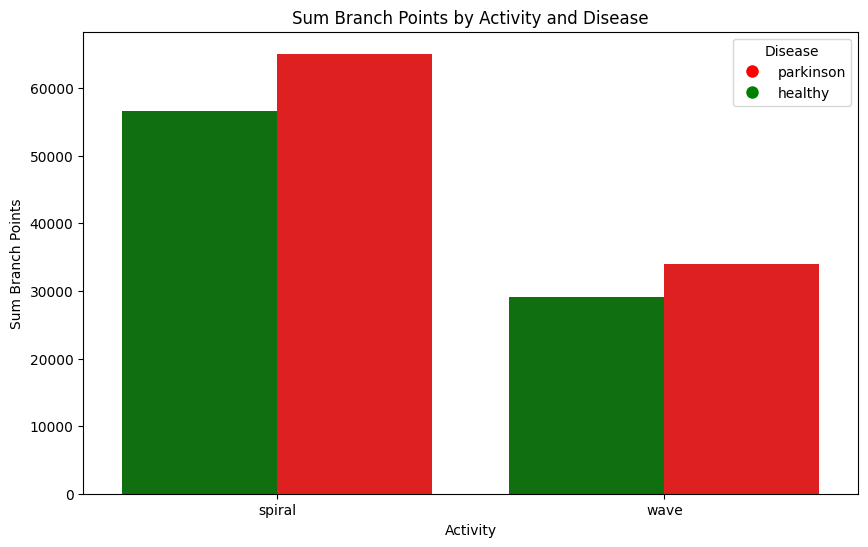

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Raggruppa il DataFrame per 'activity' e 'disease' e calcola la media dei branch points
grouped = draw_df.groupby(['activity', 'disease'])['branch_points'].sum().reset_index()

# Definisci una palette di colori personalizzata
custom_palette = {'parkinson': 'red', 'healthy': 'green'}

# Crea il grafico usando seaborn con la palette personalizzata
plt.figure(figsize=(10, 6))
sns.barplot(x='activity', y='branch_points', hue='disease', data=grouped, palette=custom_palette)

# Aggiungi legenda con colori personalizzati
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for label, color in custom_palette.items()]
plt.legend(handles=legend_labels, title='Disease', loc='upper right')

# Aggiungi etichette
plt.xlabel('Activity')
plt.ylabel('Sum Branch Points')
plt.title('Sum Branch Points by Activity and Disease')

# Mostra il grafico
plt.show()


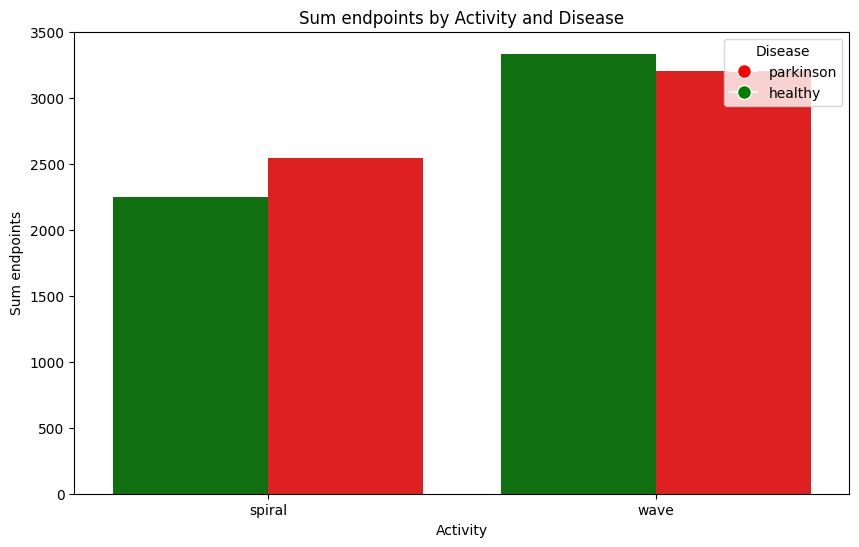

In [ ]:
import seaborn as sns

# Raggruppa il DataFrame per 'activity' e 'disease' e calcola la media dei branch points
grouped = draw_df.groupby(['activity', 'disease'])['endpoints'].mean().reset_index()

# Definisci una palette di colori personalizzata
custom_palette = {'parkinson': 'red', 'healthy': 'green'}

# Crea il grafico usando seaborn con la palette personalizzata
plt.figure(figsize=(10, 6))
sns.barplot(x='activity', y='endpoints', hue='disease', data=grouped, palette=custom_palette)

# Aggiungi legenda con colori personalizzati
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for label, color in custom_palette.items()]
plt.legend(handles=legend_labels, title='Disease', loc='upper right')

# Aggiungi etichette
plt.xlabel('Activity')
plt.ylabel('Sum endpoints')
plt.title('Sum endpoints by Activity and Disease')

# Mostra il grafico
plt.show()


Lunghezza media dei segmenti e lunghezza totale del percorso scheletrico

In [ ]:
from skimage.morphology import skeletonize

def average_segment_length(skeleton_image):
    # Calcola l'immagine dello scheletro
    skeleton = skeletonize(skeleton_image)

    # Etichetta i segmenti e calcola la lunghezza di ciascun segmento
    labeled_skeleton, num_features = ndimage.label(skeleton)
    segment_lengths = np.array(ndimage.sum(skeleton, labeled_skeleton, range(1, num_features + 1)))

    # Calcola la lunghezza media dei segmenti
    average_length = np.mean(segment_lengths)

    return average_length

def total_skeleton_length(skeleton_image):
    # Calcola l'immagine dello scheletro
    skeleton = skeletonize(skeleton_image)

    # Calcola la lunghezza totale del percorso scheletrico
    total_length = np.sum(skeleton)

    return total_length

# Calcola lunghezza media dei segmenti e lunghezza totale del percorso scheletrico per tutte le immagini
draw_df['avg_segment_length'] = draw_df['clean_img'].apply(average_segment_length)
draw_df['total_skeleton_length'] = draw_df['clean_img'].apply(total_skeleton_length)


In [ ]:
# Raggruppa il DataFrame per 'activity' e 'disease' e calcola le statistiche
grouped = draw_df.groupby(['activity', 'disease']).agg({
    'avg_segment_length': 'median',
    'total_skeleton_length': 'sum'
}).reset_index()

# Rinomina le colonne per chiarezza
grouped = grouped.rename(columns={
    'avg_segment_length': 'Median Avg Segment Length',
    'total_skeleton_length': 'Total Skeleton Length'
})

# Visualizza la tabellina
print(grouped)

  activity    disease  Median Avg Segment Length  Total Skeleton Length
0   spiral    healthy                   2.506122                  71432
1   spiral  parkinson                   2.548837                  81769
2     wave    healthy                   6.143836                  86318
3     wave  parkinson                   5.059524                  80723


Densità di punti di intersezione e densità di punti finali

In [ ]:
def intersection_density(image):
    # Calculate the skeleton of the image
    skeleton = skeletonize(image)

    # Calculate the number of intersection points
    num_intersections = np.sum(convolve2d(skeleton, k_branch_points, mode='same') == 3)

    # Calculate the area of the image
    total_area = np.sum(image)

    # Calculate the intersection density
    density = num_intersections / total_area

    return density

def endpoint_density(image):
    # Calculate the skeleton of the image
    skeleton = skeletonize(image)

    # Calculate the number of endpoints
    num_endpoints = np.sum(convolve2d(skeleton, k_endpoints, mode='same') == 1)

    # Calculate the area of the image
    total_area = np.sum(image)

    # Calculate the endpoint density
    density = num_endpoints / total_area

    return density

# Calculate intersection density and endpoint density for all images
draw_df['intersection_density'] = draw_df['clean_img'].apply(intersection_density)
draw_df['endpoint_density'] = draw_df['clean_img'].apply(endpoint_density)


In [ ]:
# Calcola la densità di intersezione e la densità di endpoint per tutte le immagini
draw_df['intersection_density'] = draw_df['clean_img'].apply(intersection_density)
draw_df['endpoint_density'] = draw_df['clean_img'].apply(endpoint_density)

# Raggruppa il DataFrame per 'activity' e 'disease' e calcola le statistiche
grouped = draw_df.groupby(['activity', 'disease']).agg({
    'intersection_density': 'mean',
    'endpoint_density': 'mean'
}).reset_index()

# Rinomina le colonne per chiarezza
grouped = grouped.rename(columns={
    'intersection_density': 'Mean Intersection Density',
    'endpoint_density': 'Mean Endpoint Density'
})

# Visualizza la tabellina
print(grouped)

  activity    disease  Mean Intersection Density  Mean Endpoint Density
0   spiral    healthy                   0.581415               0.424406
1   spiral  parkinson                   0.588297               0.432951
2     wave    healthy                   0.855157               0.638555
3     wave  parkinson                   0.739997               0.571322


Rapporto tra punti di intersezione e punti finali

In [ ]:
def intersection_to_endpoint_ratio(image):
    # Calculate the skeleton of the image
    skeleton = skeletonize(image)

    # Calculate the number of intersection points
    num_intersections = np.sum(convolve2d(skeleton, k_branch_points, mode='same') == 3)

    # Calculate the number of endpoints
    num_endpoints = np.sum(convolve2d(skeleton, k_endpoints, mode='same') == 1)

    # Calculate the ratio between intersection points and endpoints
    ratio = num_intersections / num_endpoints if num_endpoints > 0 else 0

    return ratio

# Calculate intersection to endpoint ratio for all images
draw_df['intersection_to_endpoint_ratio'] = draw_df['clean_img'].apply(intersection_to_endpoint_ratio)


In [ ]:
# Calcola il rapporto tra punti di intersezione e punti finali per tutte le immagini
draw_df['intersection_to_endpoint_ratio'] = draw_df['clean_img'].apply(intersection_to_endpoint_ratio)

# Raggruppa il DataFrame per 'activity' e 'disease' e calcola le statistiche
grouped = draw_df.groupby(['activity', 'disease']).agg({
    'intersection_to_endpoint_ratio': 'mean'
}).reset_index()

# Rinomina la colonna per chiarezza
grouped = grouped.rename(columns={
    'intersection_to_endpoint_ratio': 'Mean Intersection-to-Endpoint Ratio'
})

# Visualizza la tabellina
print(grouped)

  activity    disease  Mean Intersection-to-Endpoint Ratio
0   spiral    healthy                             1.367877
1   spiral  parkinson                             1.361127
2     wave    healthy                             1.338562
3     wave  parkinson                             1.294068


In [ ]:
# Calcola il rapporto tra punti di intersezione e punti finali per tutte le immagini
draw_df['intersection_to_endpoint_ratio'] = draw_df['clean_img'].apply(intersection_to_endpoint_ratio)

# Raggruppa il DataFrame per 'activity' e 'disease' e calcola il range del rapporto
grouped = draw_df.groupby(['activity', 'disease']).agg({
    'intersection_to_endpoint_ratio': lambda x: np.max(x) - np.min(x)  # Calcola il range per il rapporto
}).reset_index()

# Rinomina la colonna per chiarezza
grouped = grouped.rename(columns={
    'intersection_to_endpoint_ratio': 'Range Intersection-to-Endpoint Ratio'
})

# Visualizza la tabellina
print(grouped)


  activity    disease  Range Intersection-to-Endpoint Ratio
0   spiral    healthy                              0.277254
1   spiral  parkinson                              0.282005
2     wave    healthy                              0.100876
3     wave  parkinson                              0.208010


media dei livelli di grigio

In [ ]:
def average_gray_intensity(image):
    # Calculate the mean gray intensity of the image
    mean_intensity = np.mean(image)

    return mean_intensity

# Calculate average gray intensity for all images
draw_df['avg_gray_intensity'] = draw_df['clean_img'].apply(average_gray_intensity)

In [ ]:
# Raggruppa il DataFrame per 'activity' e 'disease' e calcola la media dell'intensità grigia
grouped = draw_df.groupby(['activity', 'disease'])['avg_gray_intensity'].mean().reset_index()

# Rinomina la colonna per chiarezza
grouped = grouped.rename(columns={'avg_gray_intensity': 'Mean Avg Gray Intensity'})

# Visualizza la tabellina
print(grouped)


  activity    disease  Mean Avg Gray Intensity
0   spiral    healthy                 0.083395
1   spiral  parkinson                 0.095832
2     wave    healthy                 0.083591
3     wave  parkinson                 0.091720


In [ ]:
grouped = draw_df.groupby(['activity', 'disease']).agg({
    'avg_gray_intensity': lambda x: np.max(x) - np.min(x)  # Calcola il range dell'intensità grigia
}).reset_index()

# Rinomina la colonna per chiarezza
grouped = grouped.rename(columns={'avg_gray_intensity': 'Range Avg Gray Intensity'})

# Visualizza la tabellina
print(grouped)

  activity    disease  Range Avg Gray Intensity
0   spiral    healthy                  0.087540
1   spiral  parkinson                  0.166809
2     wave    healthy                  0.106415
3     wave  parkinson                  0.143921


deviazione standard dei livelli di grigio

In [ ]:
def gray_std_dev(image):
    # Calcola la deviazione standard dei livelli di grigio dell'immagine
    std_dev = np.std(image)

    return std_dev

# Calcola la deviazione standard dei livelli di grigio per tutte le immagini
draw_df['gray_std_dev'] = draw_df['clean_img'].apply(gray_std_dev)


In [ ]:
grouped = draw_df.groupby(['activity', 'disease']).agg({
    'avg_gray_intensity': lambda x: np.max(x) - np.min(x),  # Calcola il range per 'avg_gray_intensity'
    'gray_std_dev': lambda x: np.max(x) - np.min(x)         # Calcola il range per 'gray_std_dev'
}).reset_index()

# Rinomina le colonne per chiarezza
grouped = grouped.rename(columns={
    'avg_gray_intensity': 'Range Avg Gray Intensity',
    'gray_std_dev': 'Range Gray Std Dev'  # Rinomina la colonna per la deviazione standard
})

# Visualizza la tabellina
print(grouped)

  activity    disease  Range Avg Gray Intensity  Range Gray Std Dev
0   spiral    healthy                  0.087540            0.128834
1   spiral  parkinson                  0.166809            0.192642
2     wave    healthy                  0.106415            0.138724
3     wave  parkinson                  0.143921            0.192057


entropia

In [ ]:
# Define a function to calculate entropy
def calculate_entropy(image):
    hist, _ = np.histogram(image, bins=256, range=(0, 1))
    hist = hist / hist.sum()
    return entropy(hist, base=2)

# Calculate entropy for all images
draw_df['entropy'] = draw_df['clean_img'].apply(calculate_entropy)


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


In [ ]:
# Raggruppa il DataFrame per 'activity' e 'disease' e calcola la media dell'entropia
grouped = draw_df.groupby(['activity', 'disease'])['entropy'].mean().reset_index()

# Rinomina la colonna per chiarezza
grouped = grouped.rename(columns={'entropy': 'Mean Entropy'})

# Visualizza la tabellina
print(grouped)

  activity    disease  Mean Entropy
0   spiral    healthy      0.411622
1   spiral  parkinson      0.446789
2     wave    healthy      0.410521
3     wave  parkinson      0.434582


momenti di co-occorrenza

In [ ]:
def compute_glcm_features(image):
    # Calculate the skeleton of the image
    skeleton = skeletonize(image)

    # Calculate the GLCM
    distances = [1]  # Only consider distance of 1 pixel
    angles = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4]  # Consider horizontal, diagonal, and vertical directions
    glcm = greycomatrix(skeleton, distances=distances, angles=angles, symmetric=True, normed=True,levels=256)

    # Calculate GLCM features
    contrast = greycoprops(glcm, prop='contrast').ravel()
    dissimilarity = greycoprops(glcm, prop='dissimilarity').ravel()
    homogeneity = greycoprops(glcm, prop='homogeneity').ravel()
    energy = greycoprops(glcm, prop='energy').ravel()
    correlation = greycoprops(glcm, prop='correlation').ravel()

    glcm_features = np.concatenate((contrast, dissimilarity, homogeneity, energy, correlation))

    return glcm_features

# Calculate GLCM features for all images
draw_df['glcm_features'] = draw_df['clean_img'].apply(compute_glcm_features)

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

In [ ]:
draw_df['glcm_features'] = draw_df['clean_img'].apply(compute_glcm_features)

# Estrai le feature GLCM in colonne separate
draw_df['contrast'] = draw_df['glcm_features'].apply(lambda x: x[0])
draw_df['dissimilarity'] = draw_df['glcm_features'].apply(lambda x: x[1])
draw_df['homogeneity'] = draw_df['glcm_features'].apply(lambda x: x[2])
draw_df['energy'] = draw_df['glcm_features'].apply(lambda x: x[3])
draw_df['correlation'] = draw_df['glcm_features'].apply(lambda x: x[4])

# Rimuovi la colonna 'glcm_features' se non è più necessaria
draw_df = draw_df.drop(columns=['glcm_features'])

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

In [ ]:
# Raggruppa il DataFrame per 'activity' e 'disease' e calcola il range per le colonne specificate
grouped = draw_df.groupby(['activity', 'disease']).agg({
    'contrast': lambda x: np.max(x) - np.min(x),        # Calcola il range per 'contrast'
    'dissimilarity': lambda x: np.max(x) - np.min(x),   # Calcola il range per 'dissimilarity'
    'homogeneity': lambda x: np.max(x) - np.min(x),     # Calcola il range per 'homogeneity'
    'energy': lambda x: np.max(x) - np.min(x),          # Calcola il range per 'energy'
    'correlation': lambda x: np.max(x) - np.min(x)      # Calcola il range per 'correlation'
}).reset_index()

# Rinomina le colonne per chiarezza
grouped = grouped.rename(columns={
    'contrast': 'Range Contrast',
    'dissimilarity': 'Range Dissimilarity',
    'homogeneity': 'Range Homogeneity',
    'energy': 'Range Energy',
    'correlation': 'Range Correlation'
})

# Visualizza la tabellina
print(grouped)


  activity    disease  Range Contrast  Range Dissimilarity  Range Homogeneity  \
0   spiral    healthy        0.013067             0.016086           0.013480   
1   spiral  parkinson        0.034421             0.043183           0.032782   
2     wave    healthy        0.021752             0.021807           0.004779   
3     wave  parkinson        0.038664             0.040754           0.009712   

   Range Energy  Range Correlation  
0      0.014195           0.013067  
1      0.032880           0.034421  
2      0.022391           0.021752  
3      0.036463           0.038664  


Curvatura media

In [ ]:
from skimage.morphology import medial_axis

def calculate_average_curvature(image):
    # Calculate the skeleton of the image
    skeleton = skeletonize(image)

    # Find the coordinates of skeleton points
    skel_points = np.argwhere(skeleton)

    if len(skel_points) < 3:
        return 0.0  # Return 0 if there are fewer than 3 skeleton points

    # Calculate the Euclidean distances between consecutive skeleton points
    distances = np.linalg.norm(np.diff(skel_points, axis=0), axis=1)

    # Calculate the angles between consecutive line segments
    angles = []
    for i in range(len(skel_points) - 2):
        v1 = skel_points[i + 1] - skel_points[i]
        v2 = skel_points[i + 2] - skel_points[i + 1]
        cosine_angle = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
        angles.append(np.arccos(cosine_angle))

    # Calculate curvature as the reciprocal of the radius of the circle that fits the points
    curvatures = 2 * np.sin(angles) / distances[1:]

    # Calculate the average curvature
    avg_curvature = np.mean(curvatures)

    return avg_curvature

# Calculate average curvatures for all images
draw_df['average_curvature'] = draw_df['clean_img'].apply(calculate_average_curvature)


In [ ]:
# Raggruppa il DataFrame per 'activity' e 'disease' e calcola il range della curvatura media
grouped = draw_df.groupby(['activity', 'disease']).agg({
    'average_curvature': lambda x: np.max(x) - np.min(x)  # Calcola il range della curvatura media
}).reset_index()

# Rinomina la colonna per chiarezza
grouped = grouped.rename(columns={'average_curvature': 'Range Average Curvature'})

# Visualizza la tabellina
print(grouped)

  activity    disease  Range Average Curvature
0   spiral    healthy                 0.001670
1   spiral  parkinson                 0.007697
2     wave    healthy                 0.023793
3     wave  parkinson                 0.016389


Variazione della curvatura

In [ ]:
from scipy.signal import convolve2d
from skimage.morphology import skeletonize

# Definisci il kernel per i punti di intersezione (branch points)
k_branch_points = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]])

def calculate_curvature(image):
    # Calcola lo scheletro dell'immagine
    skeleton = skeletonize(image)

    # Trova le coordinate dei punti di intersezione (branch points)
    branch_points = np.argwhere(convolve2d(skeleton, k_branch_points, mode='same') == 3)

    if len(branch_points) < 3:
        return 0.0  # Return 0 if there are fewer than 3 branch points

    # Calcola la curvatura per ogni punto di intersezione
    curvature = np.zeros(len(branch_points))
    for i in range(1, len(branch_points) - 1):
        p1, p2, p3 = branch_points[i - 1:i + 2]
        angle = np.arccos(np.dot(p2 - p1, p2 - p3) / (np.linalg.norm(p2 - p1) * np.linalg.norm(p2 - p3)))
        curvature[i] = angle

    # Calcola la variazione della curvatura tra punti consecutivi
    curvature_change = np.diff(curvature)

    avg_curvature_change = np.mean(curvature_change)

    return avg_curvature_change

# Calcola la variazione della curvatura per tutte le immagini
draw_df['curvature_change'] = draw_df['clean_img'].apply(calculate_curvature)

In [ ]:
# Raggruppa il DataFrame per 'activity' e 'disease' e calcola il range della variazione della curvatura
grouped = draw_df.groupby(['activity', 'disease']).agg({
    'curvature_change': lambda x: np.max(x) - np.min(x)  # Calcola il range della variazione della curvatura
}).reset_index()

# Rinomina la colonna per chiarezza
grouped = grouped.rename(columns={'curvature_change': 'Range Curvature Change'})

# Visualizza la tabellina
print(grouped)


  activity    disease  Range Curvature Change
0   spiral    healthy            1.533631e-17
1   spiral  parkinson            1.740346e-17
2     wave    healthy            6.749985e-18
3     wave  parkinson            1.171734e-17


spettro di potenza


In [ ]:
from scipy.fftpack import fft2, fftshift
import numpy as np

def calculate_power_spectrum(image):
    # Calcola la trasformata di Fourier bidimensionale dell'immagine
    f_transform = fft2(image)

    # Sposta lo zero frequency component (DC component) al centro
    f_transform_shifted = fftshift(f_transform)

    # Calcola il modulo del quadrato dello spettro di potenza
    power_spectrum = np.abs(f_transform_shifted) ** 2

    return power_spectrum

# Assicurati che la colonna 'clean_img' contenga effettivamente le immagini
# Puoi estrarre le immagini in una lista, ad esempio
image_list = draw_df['clean_img'].tolist()

# Calcola lo spettro di potenza per ciascuna immagine nella lista
power_spectrum_list = [calculate_power_spectrum(image) for image in image_list]

# Crea una nuova colonna nel DataFrame per lo spettro di potenza
draw_df['power_spectrum'] = power_spectrum_list


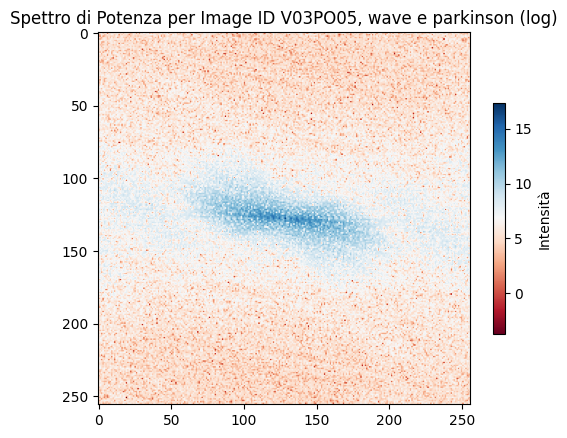

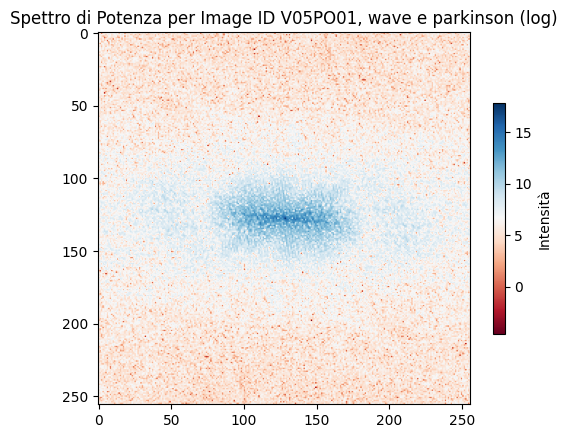

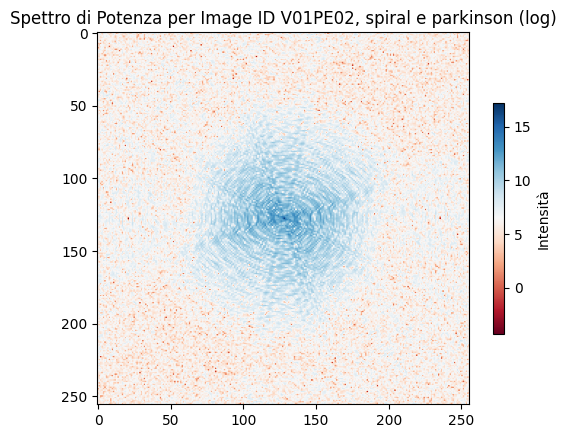

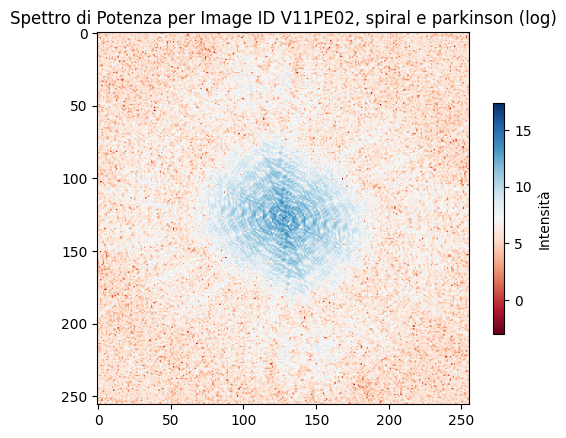

In [ ]:
import matplotlib.pyplot as plt
import random

# Scegli casualmente 4 image_id dal DataFrame
random_image_ids = random.sample(draw_df['img_id'].unique().tolist(), 4)

# Filtra il DataFrame per gli image_id selezionati casualmente
filtered_df = draw_df[draw_df['img_id'].isin(random_image_ids)]

# Itera attraverso i dati filtrati e plotta gli spettri di potenza
for index, row in filtered_df.iterrows():
    image_id = row['img_id']
    activity = row['activity']
    disease = row['disease']
    power_spectrum = row['power_spectrum']

    # Plotta lo spettro di potenza
    plt.figure(figsize=(6, 6))
    plt.imshow(np.log(power_spectrum), cmap='RdBu')
    plt.title(f'Spettro di Potenza per Image ID {image_id}, {activity} e {disease} (log)')

    # Aggiungi una colorbar e riduci la lunghezza della barra dei valori di intensità
    cbar = plt.colorbar(shrink=0.5)  # Puoi regolare il valore di shrink a tuo piacimento
    cbar.ax.set_ylabel('Intensità', rotation=90)

    plt.show()


In [ ]:
# Salva il dataframe
draw_df.to_csv('/content/drive/MyDrive/Bioscience_Project/draw_df.csv')

In [ ]:
column_types = draw_df.dtypes
print(column_types)

path                               object
img_id                             object
disease                            object
activity                           object
thresh_img                         object
clean_img                          object
x                                 float64
y                                 float64
thickness                          object
mean_thickness                    float64
std_thickness                     float64
endpoints                           int64
branch_points                       int64
avg_segment_length                float64
total_skeleton_length               int64
intersection_density              float64
endpoint_density                  float64
intersection_to_endpoint_ratio    float64
avg_gray_intensity                float64
gray_std_dev                      float64
entropy                           float64
contrast                          float64
dissimilarity                     float64
homogeneity                       

#FEATURE SELECTION

In [ ]:
# Load the CSV data
path_df = '/content/drive/MyDrive/Bioscience_Project/draw_df.csv'
df = pd.read_csv(path_df)


In [ ]:
# Load the CSV data filtered
path_df = '/content/drive/MyDrive/Bioscience_Project/draw_df.csv'
df = pd.read_csv(path_df)
df_filtered = df[df['activity'] == 'spiral']

In [ ]:
df_filtered.head()

path   img_id    disease  \
49  /content/drive/MyDrive/Bioscience_Project/draw...  V04PE01  parkinson   
50  /content/drive/MyDrive/Bioscience_Project/draw...  V07PE01  parkinson   
51  /content/drive/MyDrive/Bioscience_Project/draw...  V03PE01  parkinson   
52  /content/drive/MyDrive/Bioscience_Project/draw...  V03PE07  parkinson   
53  /content/drive/MyDrive/Bioscience_Project/draw...  V10PE03  parkinson   

   activity                                         thresh_img  \
49   spiral  [[False False False ... False False False]\n [...   
50   spiral  [[False False False ... False False False]\n [...   
51   spiral  [[False False False ... False False False]\n [...   
52   spiral  [[False False False ... False False False]\n [...   
53   spiral  [[False False False ... False False False]\n [...   

                                            clean_img         x         y  \
49  [[False False False ... False False False]\n [...  0.414062  0.968750   
50  [[False False False ... False False False]\n [...  0.550781  0.988281   
51  [[False False False ... False False False]\n [...  0.398438  0.984375   
52  [[False False False ... False False False]\n [...  0.328125  0.976562   
53  [[False False False ... False False False]\n [...  0.417969  0.980469   

                                            thickness  mean_thickness  ...  \
49                            [4. 4. 4. ... 3. 3. 3.]        2.716052  ...   
50                            [1. 1. 1. ... 2. 2. 2.]        1.241210  ...   
51  [2.         2.23606798 2.         ... 2.      ...        2.048192  ...   
52  [2.23606798 2.82842712 3.         ... 3.162277...        2.004796  ...   
53                            [4. 4. 4. ... 3. 3. 3.]        2.595381  ...   

     entropy  contrast  dissimilarity  homogeneity    energy  correlation  \
49  0.644048  0.040564       0.047428     0.036520  0.046628     0.040564   
50  0.301451  0.032598       0.033833     0.026654  0.035340     0.032598   
51  0.475846  0.034957       0.040969     0.030637  0.039246     0.034957   
52  0.419684  0.029733       0.034925     0.026593  0.033233     0.029733   
53  0.531885  0.031005       0.036571     0.030331  0.034048     0.031005   

    average_curvature  curvature_change  \
49           0.000846     -2.752619e-18   
50           0.001531      5.218440e-19   
51           0.001317     -2.618708e-18   
52           0.002418      4.135872e-18   
53           0.000991      0.000000e+00   

                                       power_spectrum          autocorrelation  
49  [[ 225.         2615.07266122 1060.10771206 .....  [0. 0. 0. ... 0. 0. 0.]  
50  [[  36.           57.66560828   29.78476618 .....  [0. 0. 0. ... 0. 0. 0.]  
51  [[ 400.         1249.98305487  613.30088005 .....  [0. 0. 0. ... 0. 0. 0.]  
52  [[ 121.          123.37611184  300.47677945 .....  [0. 0. 0. ... 0. 0. 0.]  
53  [[  36.          733.48775104  553.83850954 .....  [0. 0. 0. ... 0. 0. 0.]  

[5 rows x 30 columns]

In [ ]:
df.head()

path   img_id    disease  \
0  /content/drive/MyDrive/Bioscience_Project/draw...  V02PO01  parkinson   
1  /content/drive/MyDrive/Bioscience_Project/draw...  V07PO03  parkinson   
2  /content/drive/MyDrive/Bioscience_Project/draw...  V03PO04  parkinson   
3  /content/drive/MyDrive/Bioscience_Project/draw...  V14PO01  parkinson   
4  /content/drive/MyDrive/Bioscience_Project/draw...  V13PO01  parkinson   

  activity                                         thresh_img  \
0     wave  [[False False False ... False False False]\n [...   
1     wave  [[False False False ... False False False]\n [...   
2     wave  [[False False False ... False False False]\n [...   
3     wave  [[False False False ... False False False]\n [...   
4     wave  [[False False False ... False False False]\n [...   

                                           clean_img         x         y  \
0  [[False False False ... False False False]\n [...  0.812500  0.972656   
1  [[False False False ... False False False]\n [...  0.980469  0.984375   
2  [[False False False ... False False False]\n [...  0.789062  0.984375   
3  [[False False False ... False False False]\n [...  0.300781  0.980469   
4  [[False False False ... False False False]\n [...  0.695312  0.976562   

                                           thickness  mean_thickness  ...  \
0  [2.         2.         2.23606798 ... 3.162277...        2.806884  ...   
1  [1.         1.41421356 1.         1.         1...        1.381508  ...   
2  [1.41421356 2.         2.         ... 2.828427...        1.823512  ...   
3  [1.         1.         2.         ... 2.      ...        1.354450  ...   
4  [2.23606798 2.         2.         ... 3.      ...        1.206354  ...   

    entropy  contrast  dissimilarity  homogeneity    energy  correlation  \
0  0.559540  0.044853       0.044045     0.010355  0.039646     0.044853   
1  0.240510  0.028064       0.026451     0.010172  0.021684     0.028064   
2  0.374154  0.041360       0.039523     0.011275  0.036294     0.041360   
3  0.357351  0.050980       0.047028     0.010600  0.046874     0.050980   
4  0.297010  0.043290       0.042476     0.009099  0.040015     0.043290   

   average_curvature  curvature_change  \
0           0.002181      3.871263e-18   
1           0.015406     -4.977781e-18   
2           0.008144      1.668724e-18   
3           0.007632     -1.623727e-19   
4           0.001568     -4.205044e-18   

                                      power_spectrum          autocorrelation  
0  [[576.         496.51597901 503.32905391 ... 1...  [0. 0. 0. ... 0. 0. 0.]  
1  [[1156.           34.81229166  317.66610393 .....  [0. 0. 0. ... 0. 0. 0.]  
2  [[ 441.          358.43514433  336.79134225 .....  [0. 0. 0. ... 0. 0. 0.]  
3  [[144.         241.75570355 339.29884167 ... 3...  [0. 0. 0. ... 0. 0. 0.]  
4  [[  4.           0.74317765 156.5032584  ...  ...  [0. 0. 0. ... 0. 0. 0.]  

[5 rows x 30 columns]

In [ ]:
len(df)

202

In [ ]:
# Definisci una funzione per calcolare la media degli elementi in ciascun array
def average_power_spectrum(x):
    return np.mean(np.fromstring(x.strip('[]'), sep=' '))

# Applica la funzione di calcolo della media e assegna i risultati a una nuova colonna
df['average_power_spectrum'] = df['power_spectrum'].apply(average_power_spectrum)

<ipython-input-50-ebd7d3ad64ba>:3: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  return np.mean(np.fromstring(x.strip('[]'), sep=' '))


In [ ]:
df['average_power_spectrum']

0      525.281678
1      502.826132
2      378.742162
3      241.684848
4       53.748812
          ...    
197     47.648581
198    118.387923
199    167.894973
200    248.670443
201     48.750880
Name: average_power_spectrum, Length: 202, dtype: float64

In [ ]:

df= df.drop(columns=['x','y'])
column_types = df.dtypes
print(column_types)

path                               object
img_id                             object
disease                            object
activity                           object
thresh_img                         object
clean_img                          object
thickness                          object
mean_thickness                    float64
std_thickness                     float64
endpoints                           int64
branch_points                       int64
avg_segment_length                float64
total_skeleton_length               int64
intersection_density              float64
endpoint_density                  float64
intersection_to_endpoint_ratio    float64
avg_gray_intensity                float64
gray_std_dev                      float64
entropy                           float64
contrast                          float64
dissimilarity                     float64
homogeneity                       float64
energy                            float64
correlation                       

definizione y var risposta

In [ ]:
# Define a function to convert disease to binary
def convert_to_binary(disease):
    if disease == 'parkinson':
        return 1
    else:
        return 0

# Apply the function to create the "disease_binary" column
df['y'] = df['disease'].apply(convert_to_binary)
y = df['y']


In [ ]:
# Define a function to convert activity to binary
def convert_to_binary(activity):
    if activity == 'spiral':
        return 1
    else:
        return 0

# Apply the function to create the "disease_binary" column
df['binary_activity'] = df['activity'].apply(convert_to_binary)
binary_activity = df['binary_activity']


In [ ]:
df.head()

path   img_id    disease  \
0  /content/drive/MyDrive/Bioscience_Project/draw...  V02PO01  parkinson   
1  /content/drive/MyDrive/Bioscience_Project/draw...  V07PO03  parkinson   
2  /content/drive/MyDrive/Bioscience_Project/draw...  V03PO04  parkinson   
3  /content/drive/MyDrive/Bioscience_Project/draw...  V14PO01  parkinson   
4  /content/drive/MyDrive/Bioscience_Project/draw...  V13PO01  parkinson   

  activity                                         thresh_img  \
0     wave  [[False False False ... False False False]\n [...   
1     wave  [[False False False ... False False False]\n [...   
2     wave  [[False False False ... False False False]\n [...   
3     wave  [[False False False ... False False False]\n [...   
4     wave  [[False False False ... False False False]\n [...   

                                           clean_img  \
0  [[False False False ... False False False]\n [...   
1  [[False False False ... False False False]\n [...   
2  [[False False False ... False False False]\n [...   
3  [[False False False ... False False False]\n [...   
4  [[False False False ... False False False]\n [...   

                                           thickness  mean_thickness  \
0  [2.         2.         2.23606798 ... 3.162277...        2.806884   
1  [1.         1.41421356 1.         1.         1...        1.381508   
2  [1.41421356 2.         2.         ... 2.828427...        1.823512   
3  [1.         1.         2.         ... 2.      ...        1.354450   
4  [2.23606798 2.         2.         ... 3.      ...        1.206354   

   std_thickness  endpoints  ...  homogeneity    energy  correlation  \
0       0.688106       2945  ...     0.010355  0.039646     0.044853   
1       0.474695       1836  ...     0.010172  0.021684     0.028064   
2       0.506721       2715  ...     0.011275  0.036294     0.041360   
3       0.508027       3329  ...     0.010600  0.046874     0.050980   
4       0.445419       2857  ...     0.009099  0.040015     0.043290   

   average_curvature  curvature_change  \
0           0.002181      3.871263e-18   
1           0.015406     -4.977781e-18   
2           0.008144      1.668724e-18   
3           0.007632     -1.623727e-19   
4           0.001568     -4.205044e-18   

                                      power_spectrum          autocorrelation  \
0  [[576.         496.51597901 503.32905391 ... 1...  [0. 0. 0. ... 0. 0. 0.]   
1  [[1156.           34.81229166  317.66610393 .....  [0. 0. 0. ... 0. 0. 0.]   
2  [[ 441.          358.43514433  336.79134225 .....  [0. 0. 0. ... 0. 0. 0.]   
3  [[144.         241.75570355 339.29884167 ... 3...  [0. 0. 0. ... 0. 0. 0.]   
4  [[  4.           0.74317765 156.5032584  ...  ...  [0. 0. 0. ... 0. 0. 0.]   

   average_power_spectrum  y  binary_activity  
0              525.281678  1                0  
1              502.826132  1                0  
2              378.742162  1                0  
3              241.684848  1                0  
4               53.748812  1                0  

[5 rows x 31 columns]

verifico se le classi sono bilanciate

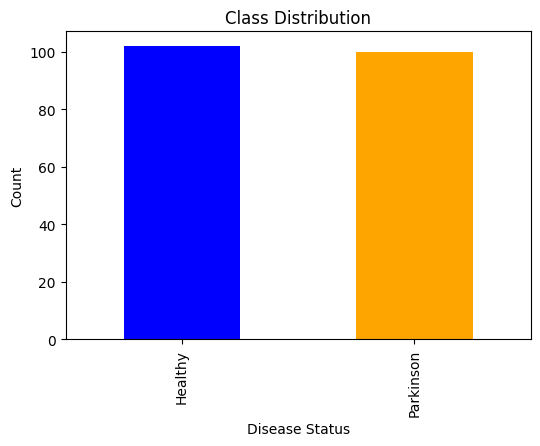

0    102
1    100
Name: y, dtype: int64


In [ ]:
# Calculate class distribution
class_distribution = y.value_counts()

# Visualize the class distribution
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Disease Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Healthy', 'Parkinson'])
plt.show()

print(class_distribution)

matrice ci correlazione

In [ ]:
# Supponendo che 'spiral_df' sia il tuo DataFrame
correlation_matrix = df.corrwith(df['y'],drop=True)
correlation_matrix

<ipython-input-57-7347520169f1>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corrwith(df['y'],drop=True)


mean_thickness                    0.098526
std_thickness                     0.222774
endpoints                         0.064517
branch_points                     0.232450
avg_segment_length               -0.162289
total_skeleton_length             0.152686
intersection_density             -0.142969
endpoint_density                 -0.103954
intersection_to_endpoint_ratio   -0.212258
avg_gray_intensity                0.189498
gray_std_dev                      0.171689
entropy                           0.177815
contrast                          0.039467
dissimilarity                     0.136189
homogeneity                       0.166129
energy                            0.005060
correlation                       0.039467
average_curvature                 0.135261
curvature_change                 -0.171406
average_power_spectrum            0.156181
y                                 1.000000
binary_activity                   0.010000
dtype: float64

<ipython-input-58-bd3de8165a7b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.dropna().corr()


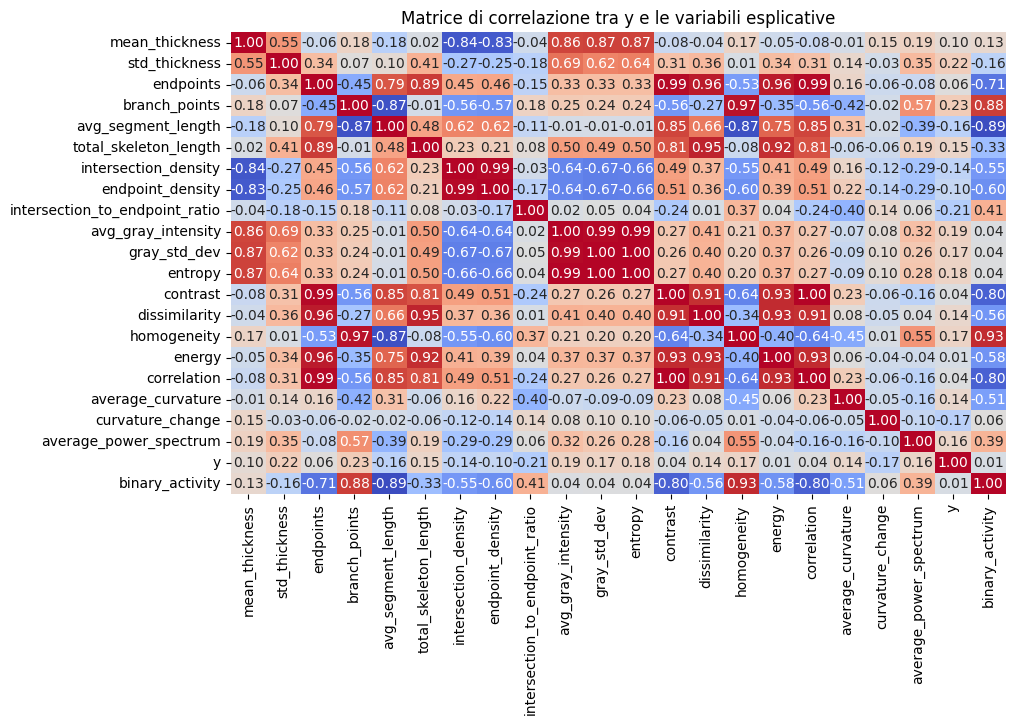

In [ ]:
import seaborn as sns
correlation_matrix = df.dropna().corr()

# Plotta la matrice di correlazione
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Matrice di correlazione tra y e le variabili esplicative')
plt.show()

definisco la mia matrice X con le variabili esplicative di interesse

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer

# Select the columns for X
selected_columns = [
    'mean_thickness',
    'std_thickness',
    'endpoints',
    'branch_points',
    'avg_segment_length',
    'total_skeleton_length',
    'intersection_density',
    'endpoint_density',
    'intersection_to_endpoint_ratio',
    'avg_gray_intensity',
    'gray_std_dev',
    'entropy',
    'contrast',
    'dissimilarity',
    'homogeneity',
    'energy',
    'correlation',
    'average_curvature',
    'curvature_change',
    'average_power_spectrum',
    'binary_activity'
]


# Extract the selected columns and target variable
X = df[selected_columns]


# Apply StandardScaler to the numerical columns
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

<ipython-input-59-0c4d4aada976>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_cols] = scaler.fit_transform(X[num_cols])


##MODELLO DI REGRESSIONE LOGISTICA

In [ ]:
from sklearn.model_selection import RepeatedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
import joblib

# Prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)

# Create the logistic regression model
model_logistic = LogisticRegression()

# Define a grid of C values to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

# Create GridSearchCV to search for the best C value
grid_search = GridSearchCV(estimator=model_logistic, param_grid=param_grid, scoring='accuracy', cv=cv, n_jobs=-1)

# Fit the model to the data using GridSearchCV
grid_search.fit(X, y)


# Print the best C value and corresponding accuracy
print("Best C value:", grid_search.best_params_['C'])
print("Best Accuracy:", grid_search.best_score_)

# Save the trained model to a file
joblib.dump(grid_search.best_estimator_, '/content/modello_logistic_regression.pkl')




Best C value: 10
Best Accuracy: 0.7494285714285716


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['/content/modello_logistic_regression.pkl']

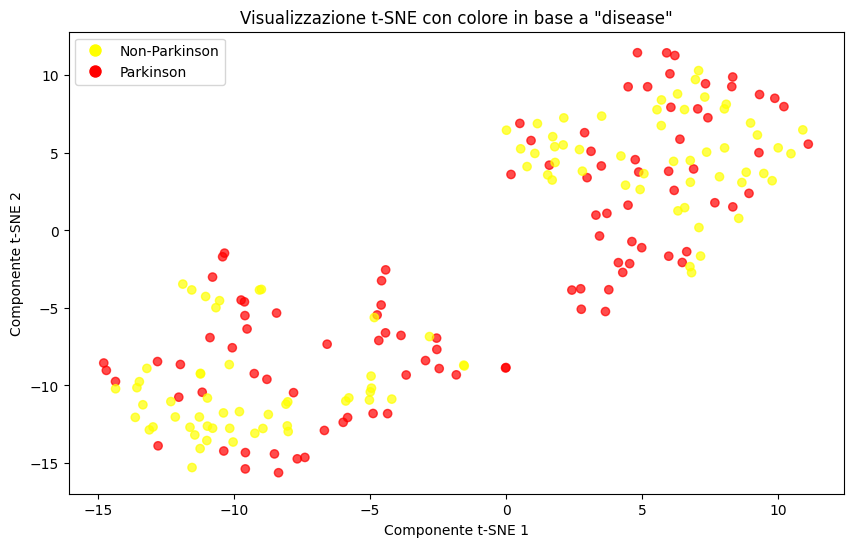

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import joblib  # Importa la libreria per il caricamento dei modelli .pkl

# Carica il modello TSNE da un file .pkl precedentemente salvato in Colab
model_path = '/content/modello_logistic_regression.pkl'  # Sostituisci con il percorso corretto
tsne = joblib.load(model_path)


# Crea un oggetto TSNE con due componenti per la visualizzazione bidimensionale
tsne_model = TSNE(n_components=2, random_state=1)

# Calcola le coordinate t-SNE dei dati X
X_tsne = tsne_model.fit_transform(X)

# Crea un array di colori in base alla variabile 'disease'
colors = np.array(['yellow' if label == 0 else 'red' for label in y])

# Crea un grafico a dispersione
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors, marker='o', alpha=0.7)

# Aggiungi etichette e una legenda
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Visualizzazione t-SNE con colore in base a "disease"')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Non-Parkinson', markerfacecolor='yellow', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='Parkinson', markerfacecolor='red', markersize=10)])

# Mostra il grafico
plt.show()


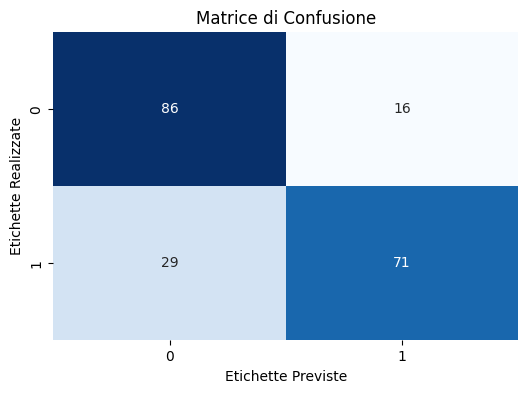

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Supponendo che 'y_true' siano le etichette reali e 'y_pred' siano le etichette previste dal modello
y_true = df['y']  # Sostituisci con le tue etichette reali
y_pred = grid_search.predict(X)  # Sostituisci con le tue previsioni del modello

# Calcola la matrice di confusione
confusion = confusion_matrix(y_true, y_pred)

# Crea un grafico della matrice di confusione utilizzando Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)

# Aggiungi etichette agli assi
plt.xlabel('Etichette Previste')
plt.ylabel('Etichette Realizzate')
plt.title('Matrice di Confusione')

# Mostra il grafico
plt.show()


In [ ]:
# Ottenere il miglior modello addestrato dalla GridSearchCV
best_model = grid_search.best_estimator_

# Ottenere i coefficienti del modello
coefficients = best_model.coef_

# Ottenere i nomi delle variabili utilizzate nel modello
feature_names = X.columns  # Sostituisci con il nome corretto del DataFrame delle features

# Creare un DataFrame per visualizzare i coefficienti con i nomi delle variabili
coefficients_df = pd.DataFrame({'Variable': feature_names, 'Coefficient': coefficients[0]})

# Visualizzare il DataFrame dei coefficienti
print(coefficients_df)

                          Variable  Coefficient
0                   mean_thickness     0.595021
1                    std_thickness     0.033897
2                        endpoints    -2.008272
3                    branch_points    -0.425716
4               avg_segment_length     0.269593
5            total_skeleton_length     3.089507
6             intersection_density    -1.004600
7                 endpoint_density     0.764931
8   intersection_to_endpoint_ratio    -1.827263
9               avg_gray_intensity     1.015616
10                    gray_std_dev    -1.537367
11                         entropy    -0.242810
12                        contrast    -3.337074
13                   dissimilarity     4.235216
14                     homogeneity     2.085572
15                          energy     0.586764
16                     correlation    -3.337074
17               average_curvature     0.256519
18                curvature_change    -0.263073
19          average_power_spectrum    -0

##MODELLO DI REGRESSIONE RIDGE

In [ ]:
# Create the logistic regression model
model_ridge = LogisticRegression(penalty='l2', solver='liblinear')

# Define the parameter grid for Ridge regression (alpha values)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)

# Create the GridSearchCV object to find the best C value
grid_search = GridSearchCV(model_ridge, param_grid, scoring='accuracy', cv=cv, n_jobs=-1)

# Fit the model with cross-validation
grid_search.fit(X, y)

# Display the best C value and corresponding accuracy
print('Best C value: ', grid_search.best_params_['C'])
print('Best Accuracy: %.3f' % grid_search.best_score_)

# Save the trained model to a file
joblib.dump(grid_search.best_estimator_, '/content/model_ridge.pkl')

Best C value:  100
Best Accuracy: 0.763


['/content/model_ridge.pkl']

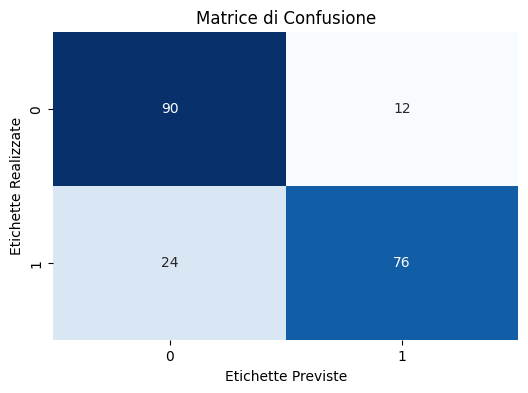

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Supponendo che 'y_true' siano le etichette reali e 'y_pred' siano le etichette previste dal modello
y_true = df['y']  # Sostituisci con le tue etichette reali
y_pred = grid_search.predict(X)  # Sostituisci con le tue previsioni del modello

# Calcola la matrice di confusione
confusion = confusion_matrix(y_true, y_pred)

# Crea un grafico della matrice di confusione utilizzando Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)

# Aggiungi etichette agli assi
plt.xlabel('Etichette Previste')
plt.ylabel('Etichette Realizzate')
plt.title('Matrice di Confusione')

# Mostra il grafico
plt.show()


In [ ]:
# Ottenere il miglior modello addestrato dalla GridSearchCV
best_model = grid_search.best_estimator_

# Ottenere i coefficienti del modello
coefficients = best_model.coef_

# Ottenere i nomi delle variabili utilizzate nel modello
feature_names = X.columns  # Sostituisci con il nome corretto del DataFrame delle features

# Creare un DataFrame per visualizzare i coefficienti con i nomi delle variabili
coefficients_df = pd.DataFrame({'Variable': feature_names, 'Coefficient': coefficients[0]})

# Visualizzare il DataFrame dei coefficienti
print(coefficients_df)

                          Variable  Coefficient
0                   mean_thickness     1.295667
1                    std_thickness    -0.284514
2                        endpoints   -10.382955
3                    branch_points    -1.825895
4               avg_segment_length    -0.114713
5            total_skeleton_length    12.013801
6             intersection_density    -4.084239
7                 endpoint_density     3.637668
8   intersection_to_endpoint_ratio    -4.175698
9               avg_gray_intensity     1.345481
10                    gray_std_dev    -5.119997
11                         entropy     1.988745
12                        contrast    -9.241060
13                   dissimilarity     9.039770
14                     homogeneity    -2.638754
15                          energy     5.047114
16                     correlation    -9.241060
17               average_curvature     0.150507
18                curvature_change    -0.264004
19          average_power_spectrum    -0

##MODELLO DI REGRESSIONE LASSO

In [ ]:
from sklearn.model_selection import RepeatedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model with L1 penalty (Lasso)
model_lasso = LogisticRegression(penalty='l1', solver='liblinear')

# Define a grid of C values for cross-validation
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

# Prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)

# Create GridSearchCV to search for the best C value
grid_search = GridSearchCV(estimator=model_lasso, param_grid=param_grid, scoring='accuracy', cv=cv, n_jobs=-1)

# Fit the model to the data using GridSearchCV
grid_search.fit(X, y)

# Print the best C value and corresponding accuracy
print("Best C value:", grid_search.best_params_['C'])
print("Best Accuracy:", grid_search.best_score_)

joblib.dump(grid_search.best_estimator_, '/content/model_lasso.pkl')

Best C value: 10
Best Accuracy: 0.7522380952380954


['/content/model_lasso.pkl']

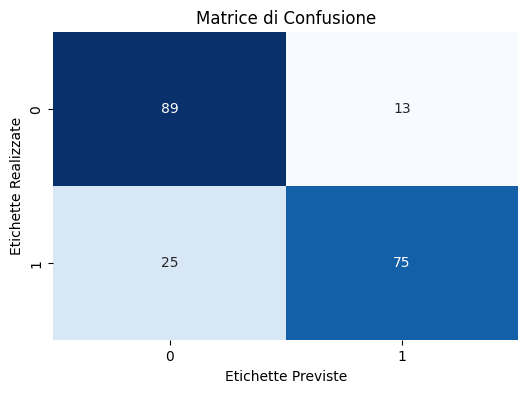

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Supponendo che 'y_true' siano le etichette reali e 'y_pred' siano le etichette previste dal modello
y_true = df['y']  # Sostituisci con le tue etichette reali
y_pred = grid_search.predict(X)  # Sostituisci con le tue previsioni del modello

# Calcola la matrice di confusione
confusion = confusion_matrix(y_true, y_pred)

# Crea un grafico della matrice di confusione utilizzando Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)

# Aggiungi etichette agli assi
plt.xlabel('Etichette Previste')
plt.ylabel('Etichette Realizzate')
plt.title('Matrice di Confusione')

# Mostra il grafico
plt.show()


In [ ]:
# Ottenere il miglior modello addestrato dalla GridSearchCV
best_model = grid_search.best_estimator_

# Ottenere i coefficienti del modello
coefficients = best_model.coef_

# Ottenere i nomi delle variabili utilizzate nel modello
feature_names = X.columns  # Sostituisci con il nome corretto del DataFrame delle features

# Creare un DataFrame per visualizzare i coefficienti con i nomi delle variabili
coefficients_df = pd.DataFrame({'Variable': feature_names, 'Coefficient': coefficients[0]})

# Visualizzare il DataFrame dei coefficienti
print(coefficients_df)

                          Variable  Coefficient
0                   mean_thickness     0.935361
1                    std_thickness    -0.275028
2                        endpoints    -8.833026
3                    branch_points    -3.324016
4               avg_segment_length     0.000000
5            total_skeleton_length    18.569818
6             intersection_density    -0.072685
7                 endpoint_density     0.000000
8   intersection_to_endpoint_ratio    -4.144266
9               avg_gray_intensity     0.979863
10                    gray_std_dev    -1.997881
11                         entropy     0.000000
12                        contrast    -8.833215
13                   dissimilarity     4.105749
14                     homogeneity    -2.817610
15                          energy     0.000000
16                     correlation    -8.690074
17               average_curvature     0.175130
18                curvature_change    -0.261915
19          average_power_spectrum    -0

#CURVA ROC PER CONFRONTARE I MODELLI MIGLIORI

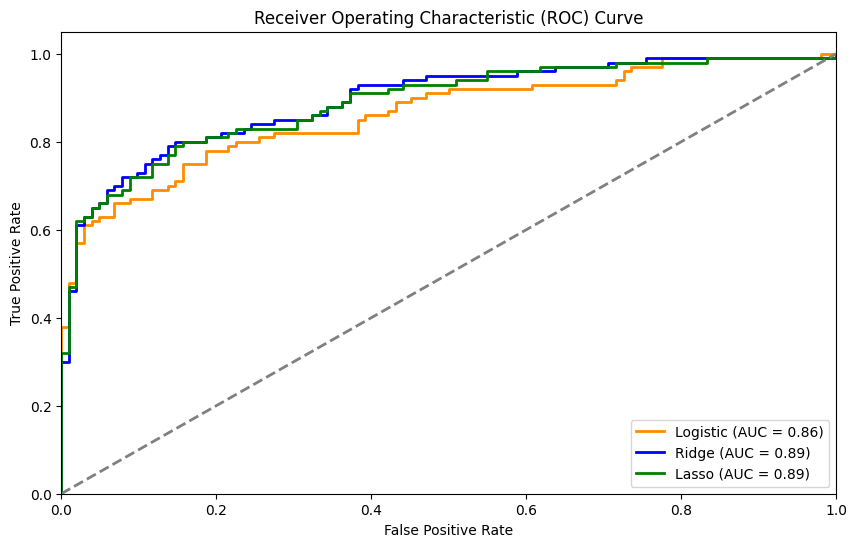

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Carica i modelli addestrati
model_logistic = joblib.load('/content/modello_logistic_regression.pkl')
model_ridge = joblib.load('/content/model_ridge.pkl')
model_lasso = joblib.load('/content/model_lasso.pkl')

# Calcola le probabilità predette per ciascun modello
y_pred_logistic = model_logistic.predict_proba(X)[:, 1]
y_pred_ridge = model_ridge.predict_proba(X)[:, 1]
y_pred_lasso = model_lasso.predict_proba(X)[:, 1]

# Calcola le curve ROC e le AUC per ciascun modello
fpr_logistic, tpr_logistic, _ = roc_curve(y, y_pred_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

fpr_ridge, tpr_ridge, _ = roc_curve(y, y_pred_ridge)
roc_auc_ridge = auc(fpr_ridge, tpr_ridge)

fpr_lasso, tpr_lasso, _ = roc_curve(y, y_pred_lasso)
roc_auc_lasso = auc(fpr_lasso, tpr_lasso)

# Plotta le curve ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label=f'Logistic (AUC = {roc_auc_logistic:.2f})')
plt.plot(fpr_ridge, tpr_ridge, color='blue', lw=2, label=f'Ridge (AUC = {roc_auc_ridge:.2f})')
plt.plot(fpr_lasso, tpr_lasso, color='green', lw=2, label=f'Lasso (AUC = {roc_auc_lasso:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
